# <center> Regresión lineal simple </center>



<h2> Resumen </h2>

En este notebook se implementa una regresión lineal simple.
* Se tiene un conjunto de datos con características de automoviles y su respectiva emisión de CO2
* La finalidad de la regresión es predecir la emisión de CO2 de un nuevo auto que no se encuentre en el conjunto de datos original


### Importación de librerías

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [3]:
# Importar datos
df = pd.read_csv("../data/FuelConsumptionCo2.csv")

# df: Un DataFrame es una estructura de datos tabular que se compone de columnas y filas ordenadas.


### Una mirada a los datos

In [4]:
# .head retorna las primeras n filas superiores, 5 por defecto
# .head(número de filas a mostrar)
df.head(7)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232


<h2>Ver detalles estadisticos básicos</h2>

In [5]:
# .describe solo funciona para los datos cuantitativos
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
# El percentil es una medida de posición usada en estadística que indica, 
# una vez ordenados los datos de menor a mayor, 
# el valor de la variable por debajo del cual se encuentra un porcentaje 

# Lista de percentiles
perc =[.20, .40, .60, .80] 

df.describe(percentiles=perc)

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
20%,2014.0,2.000000,4.000000,9.800000,7.200000,8.600000,20.000000,198.000000
40%,2014.0,2.500000,5.000000,11.700000,8.300000,10.200000,24.000000,232.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
60%,2014.0,3.600000,6.000000,13.500000,9.500000,11.760000,28.000000,264.600000
80%,2014.0,4.800000,8.000000,16.400000,11.380000,14.100000,33.000000,307.600000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Seleccionar algunas columnas para hacer un analisis más detallado

In [7]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


<h2>Graficar los datos</h2>

<h3>Histograma</h3>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f447468b908>,
      dtype=object)

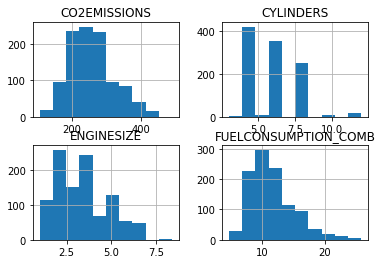

In [8]:
# Histograma: Un histograma es una representación gráfica de una variable en forma de barras, 
# donde la superficie de cada barra es proporcional a la frecuencia de los valores representados
cdf.hist()
#plt.show()

<h3>Gráfico de dispersión</h3>

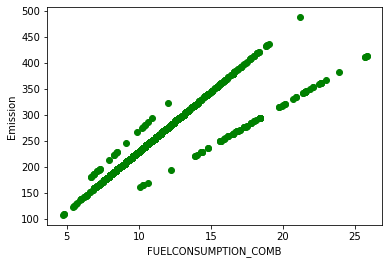

In [9]:
# Gráfico de dispersión o gráfico de burbujas: Es un tipo de diagrama que utiliza las coordenadas cartesianas 
# para mostrar los valores de dos variables para un conjunto de datos

plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='green')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

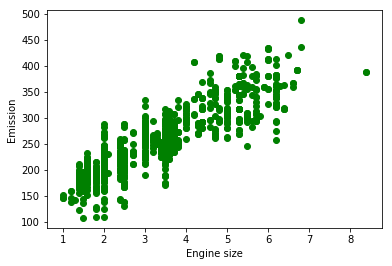

In [10]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='green')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

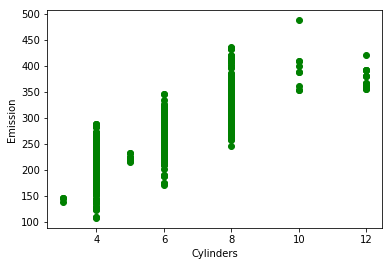

In [11]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='green')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()


### Datos de entrenamiento y datos de prueba 

* Seleccionados aleatoriamente
* Proporción 80% y 20%
* Mutuamente excluyentes

In [12]:
# Imprimir la cantidad de filas en el dataset
print ("Cantidad de filas:", len(df))

# np.random.rand(n) devuel un arreglo con n números aleatorios entre 0 y 1 [0,1)
# Luego se compara si son menores a 0.8 para saber si asignar True o False al arreglo
msk = np.random.rand(len(df)) < 0.8 
print ("Arreglo con el 80% de los datos en True, los cuales definen que filas seran usadas en el dataset de entrenamiento")
print (msk)


Cantidad de filas: 1067
Arreglo con el 80% de los datos en True, los cuales definen que filas seran usadas en el dataset de entrenamiento
[False  True  True ... False  True False]


In [13]:
# Selección de datos de entrenamientos y datos de prueba
train = cdf[msk]
test = cdf[~msk]

<h1>Regresión lineal simple</h1>

<h3>Distribución de los datos de entrenamiento:</h3>

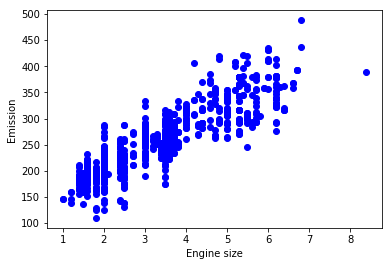

In [14]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

<h3>Usar sklearn para realizar la regresión:</h3>

In [15]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ', regr.intercept_)

Coefficients:  [[38.86910353]]
Intercept:  [126.07158731]


<h3>Mostrar el resultado</h3>


Text(0,0.5,'Emission')

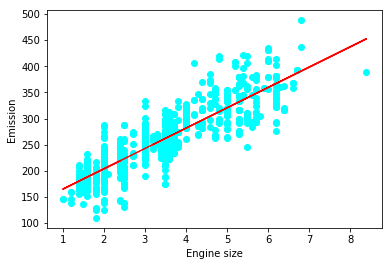

In [16]:
# Gráfico de dispersión de los datos de entrenamiento
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='cyan')

# Gráfica lineal según los resultados de la regresión lineal
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')

# Nombre de los ejes de la gráfica
plt.xlabel("Engine size")
plt.ylabel("Emission")

<h2>Evaluación del modelo</h2>

In [17]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

# Evaluar el modelo con los datos de prueba
test_y_ = regr.predict(test_x)

# Métricas para valorar el modelo generado
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

print('Variance score: %.2f' % regr.score(test_x, test_y))

Mean absolute error: 24.11
Residual sum of squares (MSE): 1051.11
R2-score: 0.66
Variance score: 0.76
